In [3]:
import pandas as pd 
import numpy as np
import math

data=pd.read_csv('acid_data.csv').values
print(data)

[[7 7 'Bad']
 [7 4 'Bad']
 [3 4 'Good']
 [1 4 'Good']
 [4 5 'Bad']
 [3 5 'Good']
 [4 6 'Bad']
 [8 7 'Bad']
 [7 9 'Good']
 [8 8 'Bad']]


In [4]:
def euclidean_distance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2+(point1[1]-point2[1])**2)

In [10]:


def knn_classifier(data, instance, k):
    distance_list = [(euclidean_distance(instance, d[:2]), d[2]) for d in data]
    print(data)
    sorted_distances = sorted(distance_list, key=lambda x: x[0])
    print(sorted_distances)
    k_nearest = sorted_distances[:k]
    classification = [point[1] for point in k_nearest]
    most_frequent = max(set(classification), key=classification.count)
    return most_frequent
    
    

In [11]:
instance = (3, 7)

k_values = [2, 3, 4]
for k in k_values:
    result = knn_classifier(data, instance, k)
    print(f'KNN (K={k}): The tissue is classified as {result}')

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('int32'), dtype('<U11')) -> None

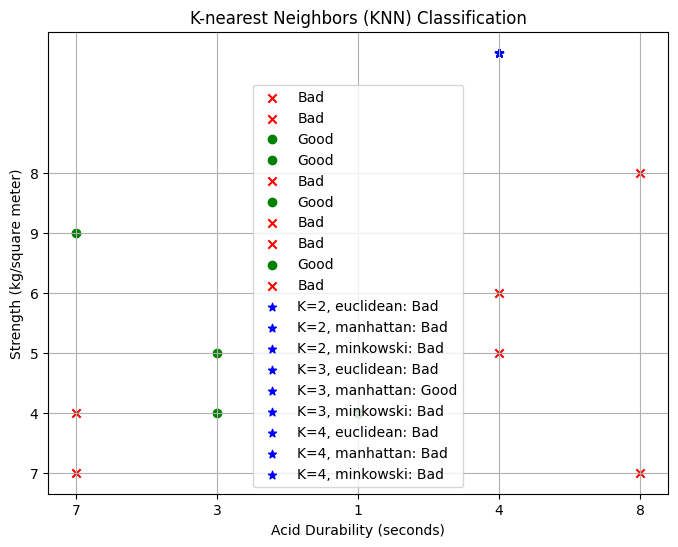

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 

# Define the training data
data = np.array([
    [7, 7, 'Bad'],
    [7, 4, 'Bad'],
    [3, 4, 'Good'],
    [1, 4, 'Good'],
    [4, 5, 'Bad'],
    [3, 5, 'Good'],
    [4, 6, 'Bad'],
    [8, 7, 'Bad'],
    [7, 9, 'Good'],
    [8, 8, 'Bad']
])

 

# Define the test instance
test_instance = np.array([3, 7])

 

# Extract features (X) and labels (Y)
X = data[:, :2].astype(float)
Y = data[:, 2]

 

# Create a distance function using Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Create a distance function using Manhattan distance
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

 

# Create a distance function using Minkowski distance
def minkowski_distance(x1, x2, p):
    return np.power(np.sum(np.abs(x1 - x2) ** p), 1/p)

 

# Function to classify a test instance using KNN
def knn_classify(X, Y, test_instance, k, distance_metric):
    distances = []
    for i in range(len(X)):
        if distance_metric == 'euclidean':
            dist = euclidean_distance(X[i], test_instance)
        elif distance_metric == 'manhattan':
            dist = manhattan_distance(X[i], test_instance)
        elif distance_metric == 'minkowski':
            dist = minkowski_distance(X[i], test_instance, 2)  # Using Minkowski with p=2 (Euclidean)
        distances.append((dist, Y[i]))

 

    distances.sort(key=lambda x: x[0])  # Sort by distance
    neighbors = distances[:k]
    neighbor_labels = [neighbor[1] for neighbor in neighbors]
    return max(set(neighbor_labels), key=neighbor_labels.count)

 

# Define the K value
k_values = [2, 3, 4]

 

# Plot the data points
plt.figure(figsize=(8, 6))
for i in range(len(data)):
    if data[i][2] == 'Bad':
        plt.scatter(data[i][0], data[i][1], c='red', marker='x', label='Bad')
    else:
        plt.scatter(data[i][0], data[i][1], c='green', marker='o', label='Good')

 

# Classify the test instance for each K and distance metric
for k in k_values:
    for distance_metric in ['euclidean', 'manhattan', 'minkowski']:
        classification = knn_classify(X, Y, test_instance, k, distance_metric)
        plt.scatter(test_instance[0], test_instance[1], c='blue', marker='*', label=f'K={k}, {distance_metric}: {classification}')

 

plt.legend()
plt.title('K-nearest Neighbors (KNN) Classification')
plt.xlabel('Acid Durability (seconds)')
plt.ylabel('Strength (kg/square meter)')
plt.grid()
plt.show()

 